In [1]:
import sys ###policyevaluatior2header
sys.path.append('../scripts/')
from puddle_world import *
import itertools #追加

In [2]:
class PolicyEvaluator: ###policyevaluatior2
    def __init__(self, widths, goal, lowerleft=np.array([-4, -4]).T, upperright=np.array([4, 4]).T): #goalの追加
        self.pose_min = np.r_[lowerleft, 0]
        self.pose_max = np.r_[upperright, math.pi*2]
        self.widths = widths
        self.goal = goal #追加
        
        self.index_nums = ((self.pose_max - self.pose_min)/self.widths).astype(int)
        nx, ny, nt = self.index_nums #以下追加
        self.indexes = list(itertools.product(range(nx), range(ny), range(nt))) #全部のインデックスの組み合わせを作っておく
        
        self.value_function, self.final_state_flags =  self.init_value_function()  #追加
        
    def init_value_function(self):  #追加
        v = np.empty(self.index_nums) #全離散状態を要素に持つ配列を作成
        f = np.zeros(self.index_nums) 
        
        for index in self.indexes:
            f[index] = self.final_state(np.array(index).T)
            v[index] = self.goal.value if f[index] else -100.0
                
        return v, f
        
    def final_state(self, index): #追加
        x_min, y_min, _ = self.pose_min + self.widths*index          #xy平面で左下の座標
        x_max, y_max, _ = self.pose_min + self.widths*(index + 1) #右上の座標（斜め上の離散状態の左下の座標）
        
        corners = [[x_min, y_min, _], [x_min, y_max, _], [x_max, y_min, _], [x_max, y_max, _] ] #4隅の座標
        return all([self.goal.inside(np.array(c).T) for c in corners ]) #全部のgoal.insideがTrueであること

In [3]:
pe = PolicyEvaluator(np.array([0.2, 0.2, math.pi/18]).T, Goal(-3,-3)) ###policyevaluatior2verifty（以下全部）

<IPython.core.display.Javascript object>


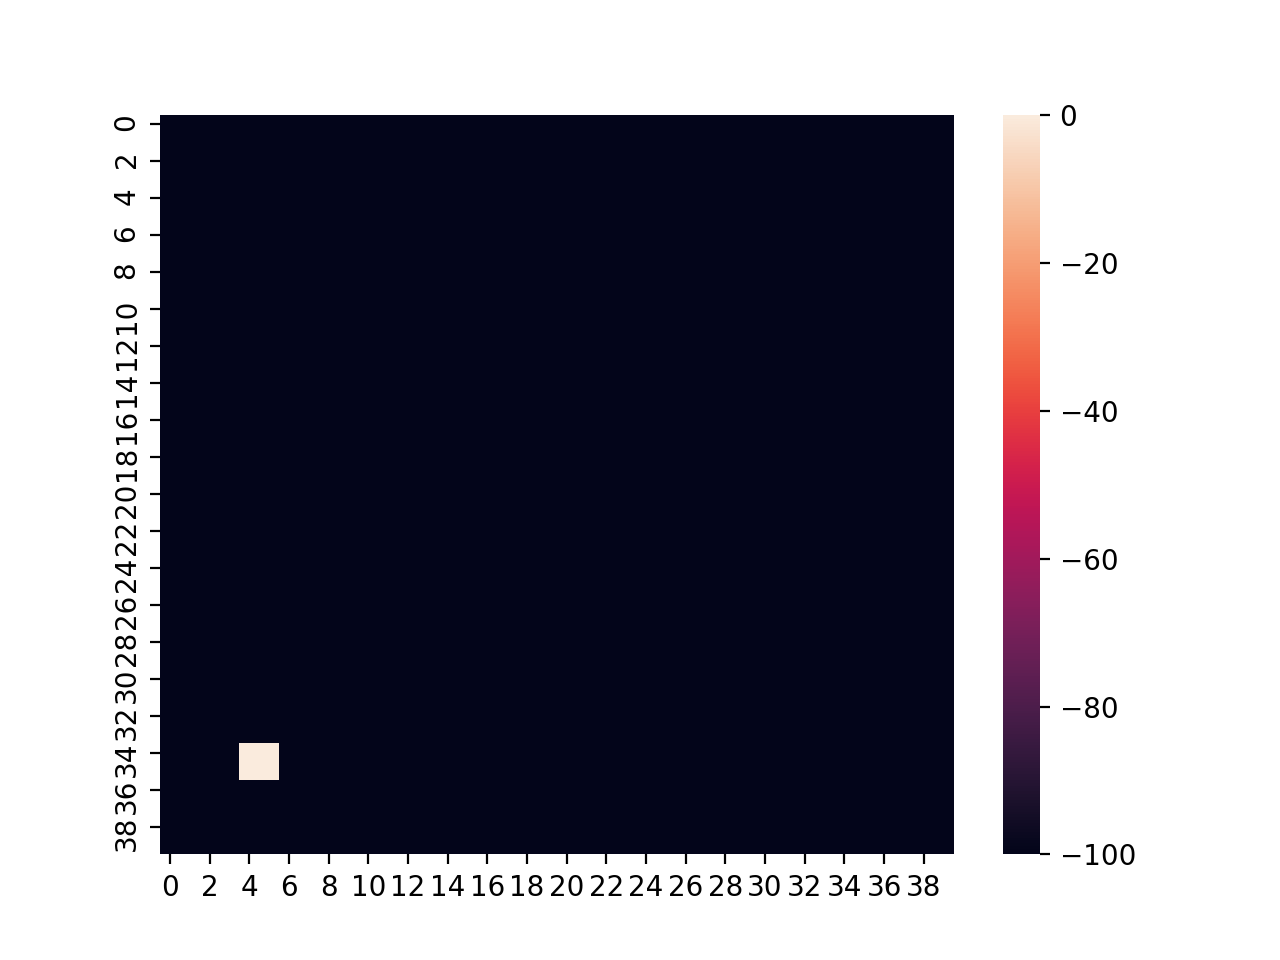

In [4]:
import seaborn as sns

v = pe.value_function[:, :, 0]
sns.heatmap(np.rot90(v), square=False) #x軸が行、y軸が列になっているので左に90度横倒しにすると世界座標系の方向と一致
plt.show()

<IPython.core.display.Javascript object>


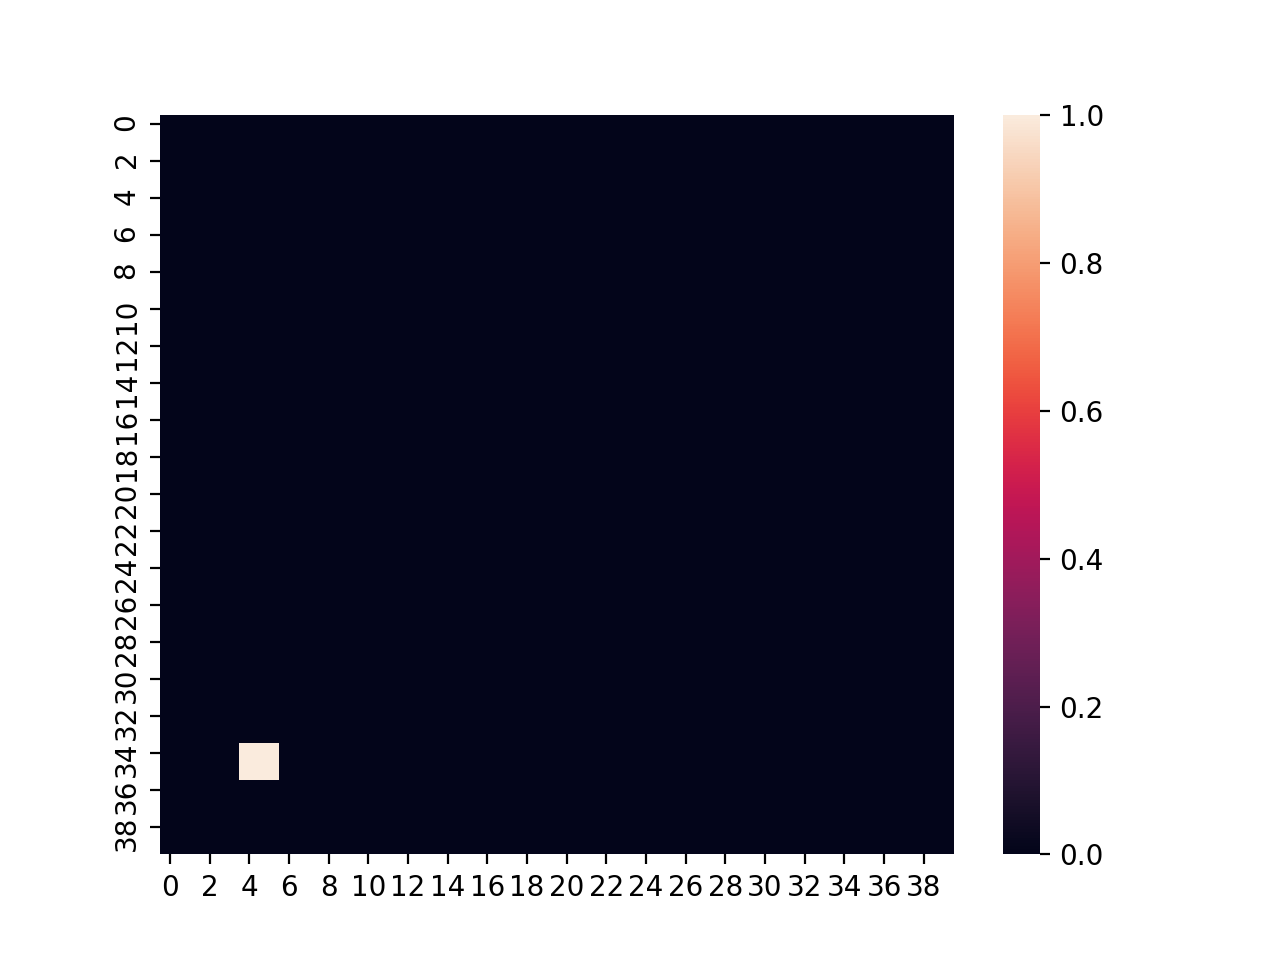

In [5]:
f = pe.final_state_flags[:, :, 0]
sns.heatmap(np.rot90(f), square=False)
plt.show()